# Importando bibliotecas

In [4]:
#importando as bibliotecas
import yfinance as yf
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
import random
import plotly.graph_objs as go

from scipy.stats import norm, t

import vectorbt as vbt
from datetime import datetime

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)
matplotlib.rcParams.update({'font.size': 22})

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
#chamando funcao
import functions as aux

# Verificando estrutura do data frame

In [7]:
carteira_teorica = 'ibov'
url = f'../result/db_matriz_preco_ct_b3_{carteira_teorica}.csv'

In [8]:
df = pd.read_csv(url, index_col=0)

In [9]:
#verificando estrutura da tabela (linhas x colunas)
df.shape

(5895, 71)

In [10]:
#verificando nome das colunas
df.columns

Index(['also3.sa', 'alpa4.sa', 'abev3.sa', 'arzz3.sa', 'b3sa3.sa', 'bbse3.sa',
       'bbdc3.sa', 'bbdc4.sa', 'brap4.sa', 'bbas3.sa', 'brkm5.sa', 'brfs3.sa',
       'ccro3.sa', 'cmig4.sa', 'ciel3.sa', 'cogn3.sa', 'cple6.sa', 'csan3.sa',
       'cpfe3.sa', 'cvcb3.sa', 'cyre3.sa', 'dxco3.sa', 'elet3.sa', 'elet6.sa',
       'embr3.sa', 'enbr3.sa', 'engi11.sa', 'enev3.sa', 'egie3.sa', 'eqtl3.sa',
       'eztc3.sa', 'flry3.sa', 'ggbr4.sa', 'goau4.sa', 'goll4.sa', 'hype3.sa',
       'itsa4.sa', 'itub4.sa', 'jbss3.sa', 'klbn11.sa', 'rent3.sa', 'lren3.sa',
       'mglu3.sa', 'mrfg3.sa', 'beef3.sa', 'mrve3.sa', 'mult3.sa', 'pcar3.sa',
       'petr3.sa', 'petr4.sa', 'prio3.sa', 'radl3.sa', 'rail3.sa', 'sbsp3.sa',
       'sanb11.sa', 'smto3.sa', 'csna3.sa', 'slce3.sa', 'suzb3.sa',
       'taee11.sa', 'vivt3.sa', 'tims3.sa', 'tots3.sa', 'ugpa3.sa', 'usim5.sa',
       'vale3.sa', 'viia3.sa', 'wege3.sa', 'yduq3.sa', 'DATE_UPDATE',
       'CARTEIRA_TEORICA'],
      dtype='object')

In [11]:
#excluindo colunas
df.drop(['DATE_UPDATE', 'CARTEIRA_TEORICA'], axis=1, inplace=True)

In [12]:
#confirmando as colunas excluidas
df.columns

Index(['also3.sa', 'alpa4.sa', 'abev3.sa', 'arzz3.sa', 'b3sa3.sa', 'bbse3.sa',
       'bbdc3.sa', 'bbdc4.sa', 'brap4.sa', 'bbas3.sa', 'brkm5.sa', 'brfs3.sa',
       'ccro3.sa', 'cmig4.sa', 'ciel3.sa', 'cogn3.sa', 'cple6.sa', 'csan3.sa',
       'cpfe3.sa', 'cvcb3.sa', 'cyre3.sa', 'dxco3.sa', 'elet3.sa', 'elet6.sa',
       'embr3.sa', 'enbr3.sa', 'engi11.sa', 'enev3.sa', 'egie3.sa', 'eqtl3.sa',
       'eztc3.sa', 'flry3.sa', 'ggbr4.sa', 'goau4.sa', 'goll4.sa', 'hype3.sa',
       'itsa4.sa', 'itub4.sa', 'jbss3.sa', 'klbn11.sa', 'rent3.sa', 'lren3.sa',
       'mglu3.sa', 'mrfg3.sa', 'beef3.sa', 'mrve3.sa', 'mult3.sa', 'pcar3.sa',
       'petr3.sa', 'petr4.sa', 'prio3.sa', 'radl3.sa', 'rail3.sa', 'sbsp3.sa',
       'sanb11.sa', 'smto3.sa', 'csna3.sa', 'slce3.sa', 'suzb3.sa',
       'taee11.sa', 'vivt3.sa', 'tims3.sa', 'tots3.sa', 'ugpa3.sa', 'usim5.sa',
       'vale3.sa', 'viia3.sa', 'wege3.sa', 'yduq3.sa'],
      dtype='object')

In [13]:
#verificando tipo do index
df.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2023-06-06', '2023-06-07', '2023-06-09', '2023-06-12', '2023-06-13',
       '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-19', '2023-06-20'],
      dtype='object', name='date', length=5895)

In [14]:
#convertendo index para data
df.index = pd.to_datetime(df.index)

In [15]:
#confirmando tipo do index
df.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2023-06-06', '2023-06-07', '2023-06-09', '2023-06-12',
               '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16',
               '2023-06-19', '2023-06-20'],
              dtype='datetime64[ns]', name='date', length=5895, freq=None)

In [16]:
df

also3.sa  alpa4.sa   abev3.sa   arzz3.sa  b3sa3.sa   bbse3.sa  \
date                                                                        
2000-01-03       NaN       NaN        NaN        NaN       NaN        NaN   
2000-01-04       NaN       NaN        NaN        NaN       NaN        NaN   
2000-01-05       NaN       NaN   0.305528        NaN       NaN        NaN   
2000-01-06       NaN       NaN   0.290040        NaN       NaN        NaN   
2000-01-07       NaN       NaN   0.290040        NaN       NaN        NaN   
...              ...       ...        ...        ...       ...        ...   
2023-06-14     23.18     10.96  15.330000  76.300003     15.22  30.530001   
2023-06-15     23.25     11.30  15.190000  76.169998     14.71  30.580000   
2023-06-16     23.40     11.15  15.070000  75.000000     14.62  30.450001   
2023-06-19     23.52     10.92  15.110000  75.110001     14.80  30.250000   
2023-06-20       NaN       NaN        NaN        NaN       NaN        NaN   

             bbdc3.sa   bbdc4.sa   brap4.sa   bbas3.sa  ...  taee11.sa  \
date                                                    ...              
2000-01-03   1.134559        NaN   1.348684   1.094031  ...        NaN   
2000-01-04   1.052046        NaN   1.252350   1.041998  ...        NaN   
2000-01-05   1.087802        NaN   1.348684   1.052672  ...        NaN   
2000-01-06   1.104304        NaN   1.348684   1.067347  ...        NaN   
2000-01-07   1.123557        NaN   1.348684   1.043332  ...        NaN   
...               ...        ...        ...        ...  ...        ...   
2023-06-14  14.470000  16.850000  23.559999  48.860001  ...  38.110001   
2023-06-15  14.540000  16.900000  23.680000  49.860001  ...  38.009998   
2023-06-16  14.540000  16.950001  23.629999  49.490002  ...  37.389999   
2023-06-19  14.840000  17.250000  23.730000  50.410000  ...  37.810001   
2023-06-20        NaN        NaN        NaN        NaN  ...        NaN   

             vivt3.sa  tims3.sa   tots3.sa   ugpa3.sa  usim5.sa   vale3.sa  \
date                                                                         
2000-01-03   7.380176       NaN        NaN        NaN  1.509654   1.665135   
2000-01-04   7.180293       NaN        NaN        NaN  1.454614   1.625489   
2000-01-05   7.260242       NaN        NaN        NaN  1.593000   1.625489   
2000-01-06   7.420146       NaN        NaN        NaN  1.737674   1.625489   
2000-01-07   7.457048       NaN        NaN        NaN  1.806867   1.684957   
...               ...       ...        ...        ...       ...        ...   
2023-06-14  44.410000     15.19  29.900000  18.000000  7.400000  69.019997   
2023-06-15  44.090000     15.12  30.350000  17.910000  7.400000  69.559998   
2023-06-16  43.000000     14.90  29.879999  17.639999  7.390000  69.669998   
2023-06-19  43.240002     14.92  29.990000  17.910000  7.500000  69.400002   
2023-06-20        NaN       NaN        NaN        NaN       NaN        NaN   

            viia3.sa   wege3.sa   yduq3.sa  
date                                        
2000-01-03  0.996683   0.122969        NaN  
2000-01-04  0.996683   0.118653        NaN  
2000-01-05  0.996683   0.118653        NaN  
2000-01-06  0.996683   0.107867        NaN  
2000-01-07  0.996683   0.107867        NaN  
...              ...        ...        ...  
2023-06-14  2.660000  37.869999  17.940001  
2023-06-15  2.660000  37.840000  18.940001  
2023-06-16  2.550000  37.849998  18.610001  
2023-06-19  2.570000  37.669998  19.000000  
2023-06-20       NaN        NaN        NaN  

[5895 rows x 69 columns]

# Selecionando o ativo para estudo

In [17]:
filter_asset = 'abev3.sa'

## Calculando o retorno mensal do ativo

In [18]:
#selecionando apenas uma acao
#calculando o retorno mensal
df_retorno_mensal = aux.pfun_pivot_calcular_retorno(filter_asset, df)

M >>>>> RETORNO DO ATIVO CALCULADO COM SUCESSO! >>>>> abev3.sa


In [19]:
#verificando as últimas linhas dos df
df_retorno_mensal.tail()

return
date             
2023-02 -0.019766
2023-03  0.070202
2023-04 -0.011863
2023-05  0.017655
2023-06  0.048577

In [20]:
#convertendo df para pivot com ano e mes
df_pivot_mensal = aux.pfun_pivot_calcular_retorno(filter_asset, df, 2)

RETORNANDO DF PIVOT!
DF PIVOT MENSAL >>>>> abev3.sa


In [21]:
df_pivot_mensal

month        1         2         3         4         5         6         7   \
year                                                                          
2000        NaN -0.065848  0.295825  0.032606 -0.031576  0.249973  0.217416   
2001   0.106386 -0.057694  0.000000  0.061227 -0.019233  0.011768 -0.050390   
2002  -0.065418  0.000000  0.000000  0.019998 -0.009803 -0.069305  0.005318   
2003  -0.060693 -0.037841  0.099541  0.063157  0.029684 -0.038443  0.000000   
2004   0.022048  0.109400  0.298609  0.101605  0.110681  0.048951 -0.041667   
2005  -0.049707  0.005299 -0.062934 -0.479439  0.013334  0.125697 -0.010000   
2006   0.025931  0.011018  0.048718  0.051345 -0.021046 -0.049769 -0.018762   
2007   0.033393  0.005654  0.095918  0.094041  0.106375  0.057700 -0.040000   
2008  -0.080000  0.113044 -0.089922 -0.044264 -0.054955 -0.081030 -0.127349   
2009  -0.046840  0.043354  0.104894  0.070929  0.092360 -0.020351  0.022634   
2010   0.000000 -0.005800 -0.067491  0.065855  0.001223  0.059063  0.046346   
2011  -0.125115 -0.013695  0.051114  0.087113 -0.024711  0.045720 -0.112071   
2012  -0.047619  0.117692  0.097670  0.071142 -0.071503  0.012552  0.018049   
2013   0.075627 -0.023097 -0.061519 -0.001465  0.003056  0.010116  0.037524   
2014  -0.062519  0.049099  0.004147 -0.033703 -0.028186 -0.006305  0.004140   
2015   0.162043  0.035048  0.014270  0.025433 -0.022163  0.030364  0.025276   
2016   0.045378 -0.048030  0.065760  0.031383 -0.014440 -0.003140 -0.006466   
2017   0.053032  0.037209  0.022421  0.001097  0.024644 -0.012719  0.045876   
2018   0.031485  0.005484  0.094091 -0.030744 -0.156022 -0.078974  0.079533   
2019   0.138492 -0.015991 -0.023215  0.097445 -0.049810  0.019373  0.125210   
2020  -0.043921 -0.185434 -0.180193 -0.048658  0.100529  0.133013 -0.016973   
2021  -0.029903 -0.072138  0.090585 -0.022891  0.201473 -0.049025 -0.025190   
2022  -0.029183  0.015364  0.013158 -0.057143 -0.022727 -0.055673  0.114179   
2023  -0.059229 -0.019766  0.070202 -0.011863  0.017655  0.048577       NaN   

month        8         9         10        11        12  
year                                                     
2000   0.017856  0.094727  0.217953  0.013157  0.220778  
2001  -0.075511 -0.205296  0.083359  0.038436  0.056789  
2002   0.031743 -0.015383  0.221354  0.028784 -0.009324  
2003   0.120000  0.071410 -0.083319  0.134546  0.017627  
2004   0.035652  0.024350  0.127048 -0.013091  0.008107  
2005   0.021885  0.103789 -0.052239  0.163779  0.017591  
2006   0.076460  0.039041 -0.035342  0.069094  0.041425  
2007   0.022728 -0.029630  0.083970 -0.088028 -0.031720  
2008   0.060241  0.053974 -0.129075  0.010639  0.050161  
2009   0.123907  0.056538  0.060079  0.066294  0.059918  
2010   0.023097  0.045238  0.116937  0.029861  0.091851  
2011   0.203703  0.010769  0.010242  0.069888  0.100806  
2012  -0.008242 -0.000157  0.079902  0.137628  0.088954  
2013  -0.028957  0.021994 -0.014526  0.052127 -0.013668  
2014   0.044672 -0.020159  0.037069  0.021951 -0.028043  
2015  -0.019517  0.025128 -0.016993 -0.023573 -0.034335  
2016   0.020745  0.032829 -0.049949 -0.081414 -0.030681  
2017   0.037076  0.059416 -0.006654 -0.016268  0.050595  
2018  -0.028851 -0.027056 -0.109051  0.035496 -0.072323  
2019  -0.070045  0.028312 -0.097143  0.038550  0.061516  
2020  -0.114388  0.018684 -0.028708  0.147783  0.149056  
2021   0.027644 -0.105263  0.110457 -0.054738 -0.002379  
2022   0.022773  0.017682  0.029601 -0.005000 -0.039883  
2023        NaN       NaN       NaN       NaN       NaN

### Plotando gráfico do retorno mensal

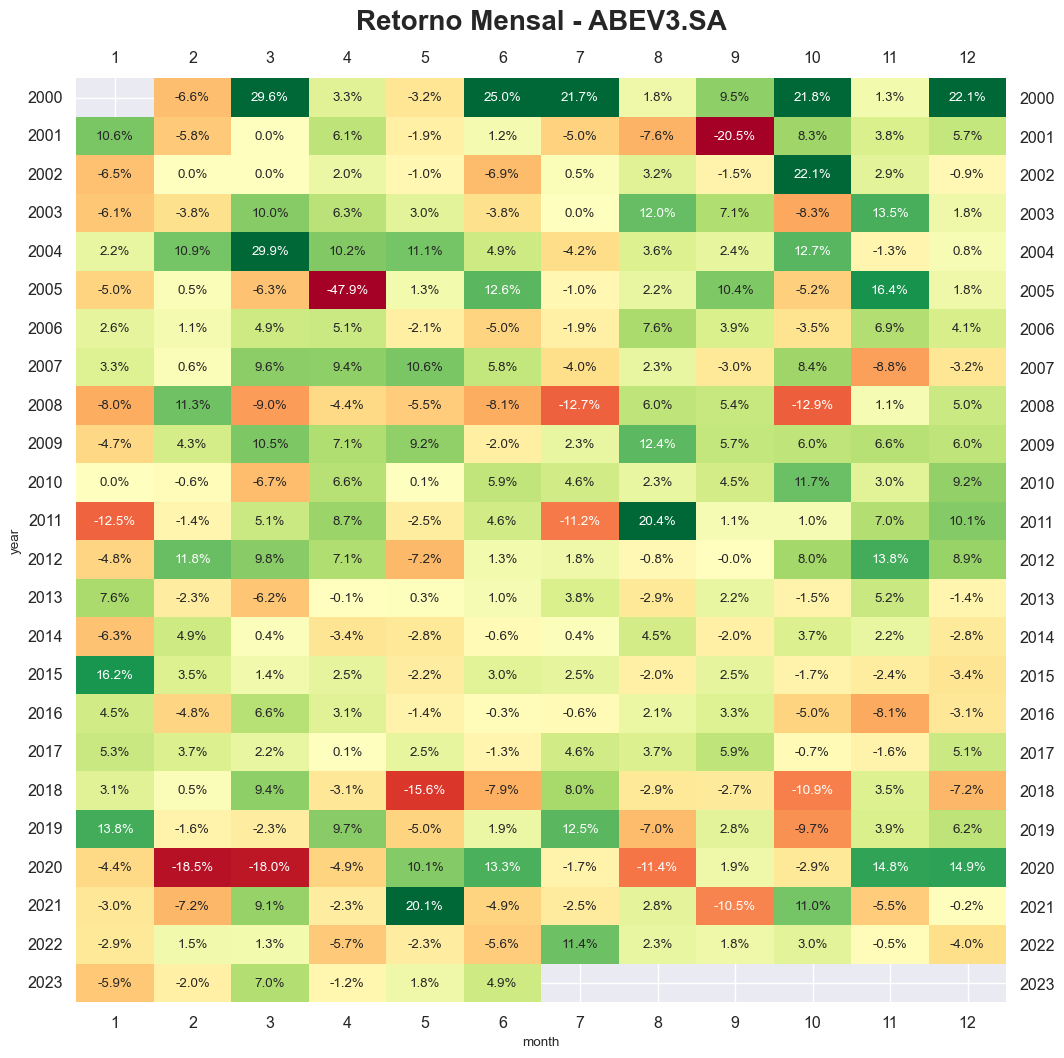

In [22]:
#visualizando grafico
plt.figure(figsize=(12,12))
sns.set(font_scale=0.8)

aux.pfun_gerar_grafico_retorno_pivot(df_pivot_mensal, filter_asset.upper(), 'r')

## Calculando o retorno trimestral do ativo

In [23]:
df_pivot_trimestral = aux.pfun_pivot_calcular_retorno(filter_asset, df, 2, 'Q')

RETORNANDO DF PIVOT!
DF PIVOT TRIMESTRAL >>>>> abev3.sa


In [24]:
df_pivot_trimestral

quarter         1         2         3         4
year                                           
2000          NaN  0.249973  0.356535  0.506413
2001     0.042554  0.053064 -0.302327  0.188887
2002    -0.065418 -0.059999  0.021274  0.244794
2003    -0.006276  0.052631  0.199980  0.058349
2004     0.472442  0.283424  0.016667  0.121311
2005    -0.104795 -0.406193  0.116667  0.122388
2006     0.087766 -0.022005  0.097500  0.074032
2007     0.138918  0.280261 -0.047273 -0.042807
2008    -0.068080 -0.169973 -0.024842 -0.075657
2009     0.098799  0.146033  0.214327  0.198084
2010    -0.072900  0.130189  0.118941  0.255945
2011    -0.092990  0.108724  0.080313  0.189802
2012     0.168435  0.007035  0.009500  0.337809
2013    -0.013860  0.011719  0.029639  0.022673
2014    -0.012411 -0.066860  0.027850  0.030113
2015     0.219934  0.033152  0.030526 -0.073120
2016     0.060610  0.013298  0.047439 -0.154072
2017     0.116703  0.012721  0.149099  0.026627
2018     0.134728 -0.246572  0.020022 -0.144150
2019     0.094278  0.062983  0.076020 -0.004657
2020    -0.361543  0.186242 -0.113154  0.281005
2021    -0.018347  0.116416 -0.103691  0.047176
2022    -0.001297 -0.129870  0.159702 -0.016406
2023    -0.013085  0.054431       NaN       NaN

### Plotando gráfico do retorno trimestral

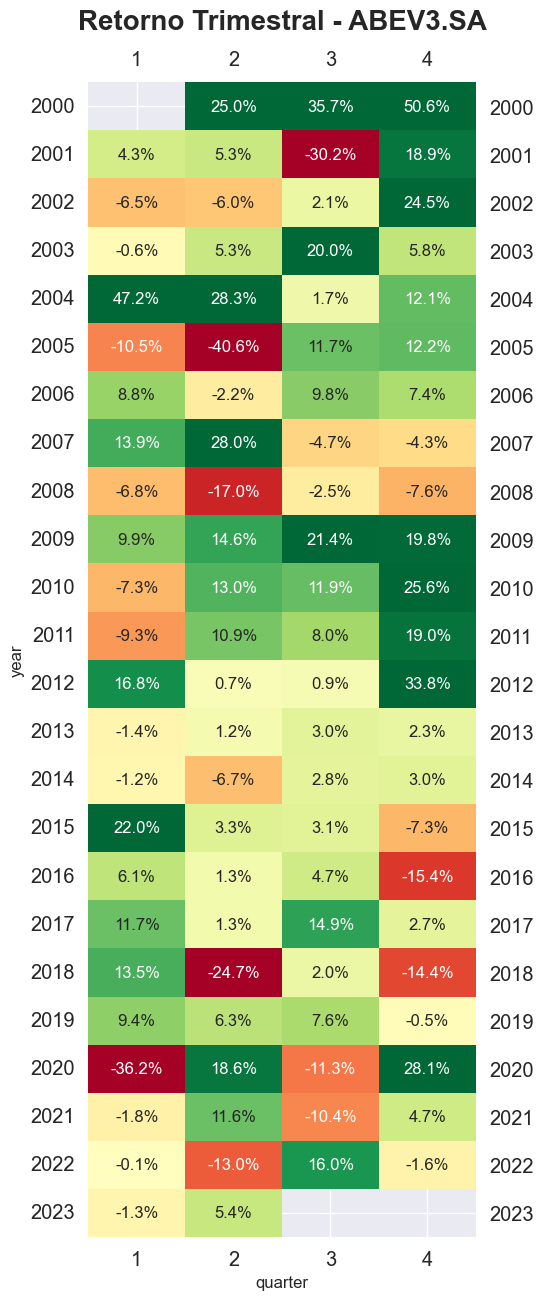

In [25]:
plt.figure(figsize=(5,15))
sns.set(font_scale=1)

aux.pfun_gerar_grafico_retorno_pivot(df_pivot_trimestral, filter_asset.upper(), 'r', 'Trimestral')

## Calculando o retorno anual do ativo

In [26]:
#calculando o retorno anual
df_retorno_anual = aux.pfun_pivot_calcular_retorno(filter_asset, df, 1, 'A')

A >>>>> RETORNO DO ATIVO CALCULADO COM SUCESSO! >>>>> abev3.sa


In [27]:
df_retorno_anual

return
date          
2001 -0.089362
2002  0.116825
2003  0.328449
2004  1.154334
2005 -0.333755
2006  0.253989
2007  0.329717
2008 -0.302765
2009  0.832054
2010  0.472501
2011  0.292586
2012  0.589093
2013  0.050560
2014 -0.024252
2015  0.203879
2016 -0.047741
2017  0.334129
2018 -0.253653
2019  0.245797
2020 -0.139593
2021  0.028636
2022 -0.008751
2023  0.040634

In [28]:
df_pivot_anual = pd.DataFrame()

for year in range(df_retorno_anual.index.size, 0, -1):
    df_pivot_anual[f"{year}Y"] = df_retorno_anual['return'].rolling(year).mean()

In [29]:
df_pivot_anual

23Y       22Y       21Y       20Y       19Y       18Y       17Y  \
date                                                                       
2001     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2002     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2003     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2004     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2005     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2006     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2007     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2008     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2009     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2010     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2011     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2012     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2013     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2014     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2015     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2016     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2017     NaN       NaN       NaN       NaN       NaN       NaN  0.244720   
2018     NaN       NaN       NaN       NaN       NaN  0.217033  0.235056   
2019     NaN       NaN       NaN       NaN  0.218547  0.235653  0.242642   
2020     NaN       NaN       NaN  0.200640  0.215903  0.221407  0.215111   
2021     NaN       NaN  0.192449  0.206539  0.211261  0.204751  0.148893   
2022     NaN  0.183303  0.196288  0.200261  0.193514  0.140135  0.168011   
2023  0.1771  0.189212  0.192659  0.185870  0.134898  0.160934  0.155461   

           16Y       15Y       14Y  ...       10Y        9Y        8Y  \
date                                ...                                 
2001       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2002       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2003       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2004       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2005       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2006       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2007       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2008       NaN       NaN       NaN  ...       NaN       NaN  0.182179   
2009       NaN       NaN       NaN  ...       NaN  0.254387  0.297356   
2010       NaN       NaN       NaN  ...  0.276199  0.316817  0.341816   
2011       NaN       NaN       NaN  ...  0.314394  0.336346  0.337333   
2012       NaN       NaN       NaN  ...  0.361620  0.365306  0.266678   
2013       NaN       NaN       NaN  ...  0.333831  0.242665  0.314717   
2014       NaN       NaN  0.262141  ...  0.215973  0.277054  0.279937   
2015       NaN  0.258257  0.283087  ...  0.269736  0.271486  0.264207   
2016  0.239132  0.261032  0.271332  ...  0.239563  0.229546  0.296085   
2017  0.265600  0.275519  0.271738  ...  0.240004  0.300312  0.233844   
2018  0.242445  0.236712  0.171167  ...  0.244915  0.179678  0.143075   
2019  0.237280  0.176143  0.212564  ...  0.186290  0.154489  0.137226   
2020  0.156409  0.189087  0.184451  ...  0.125080  0.106469  0.046141   
2021  0.179058  0.174063  0.162945  ...  0.098685  0.044196  0.043400   
2022  0.162637  0.151499  0.183946  ...  0.038901  0.037605  0.045338   
2023  0.144569  0.174392  0.127416  ...  0.037908  0.044815  0.024932   

            7Y        6Y        5Y        4Y        3Y        2Y        1Y  
date                                                                        
2001       NaN       NaN       NaN       NaN       NaN       NaN -0.089362  
2002       NaN       NaN       NaN       NaN       

### Plotando gráfico de janela de retorno anual

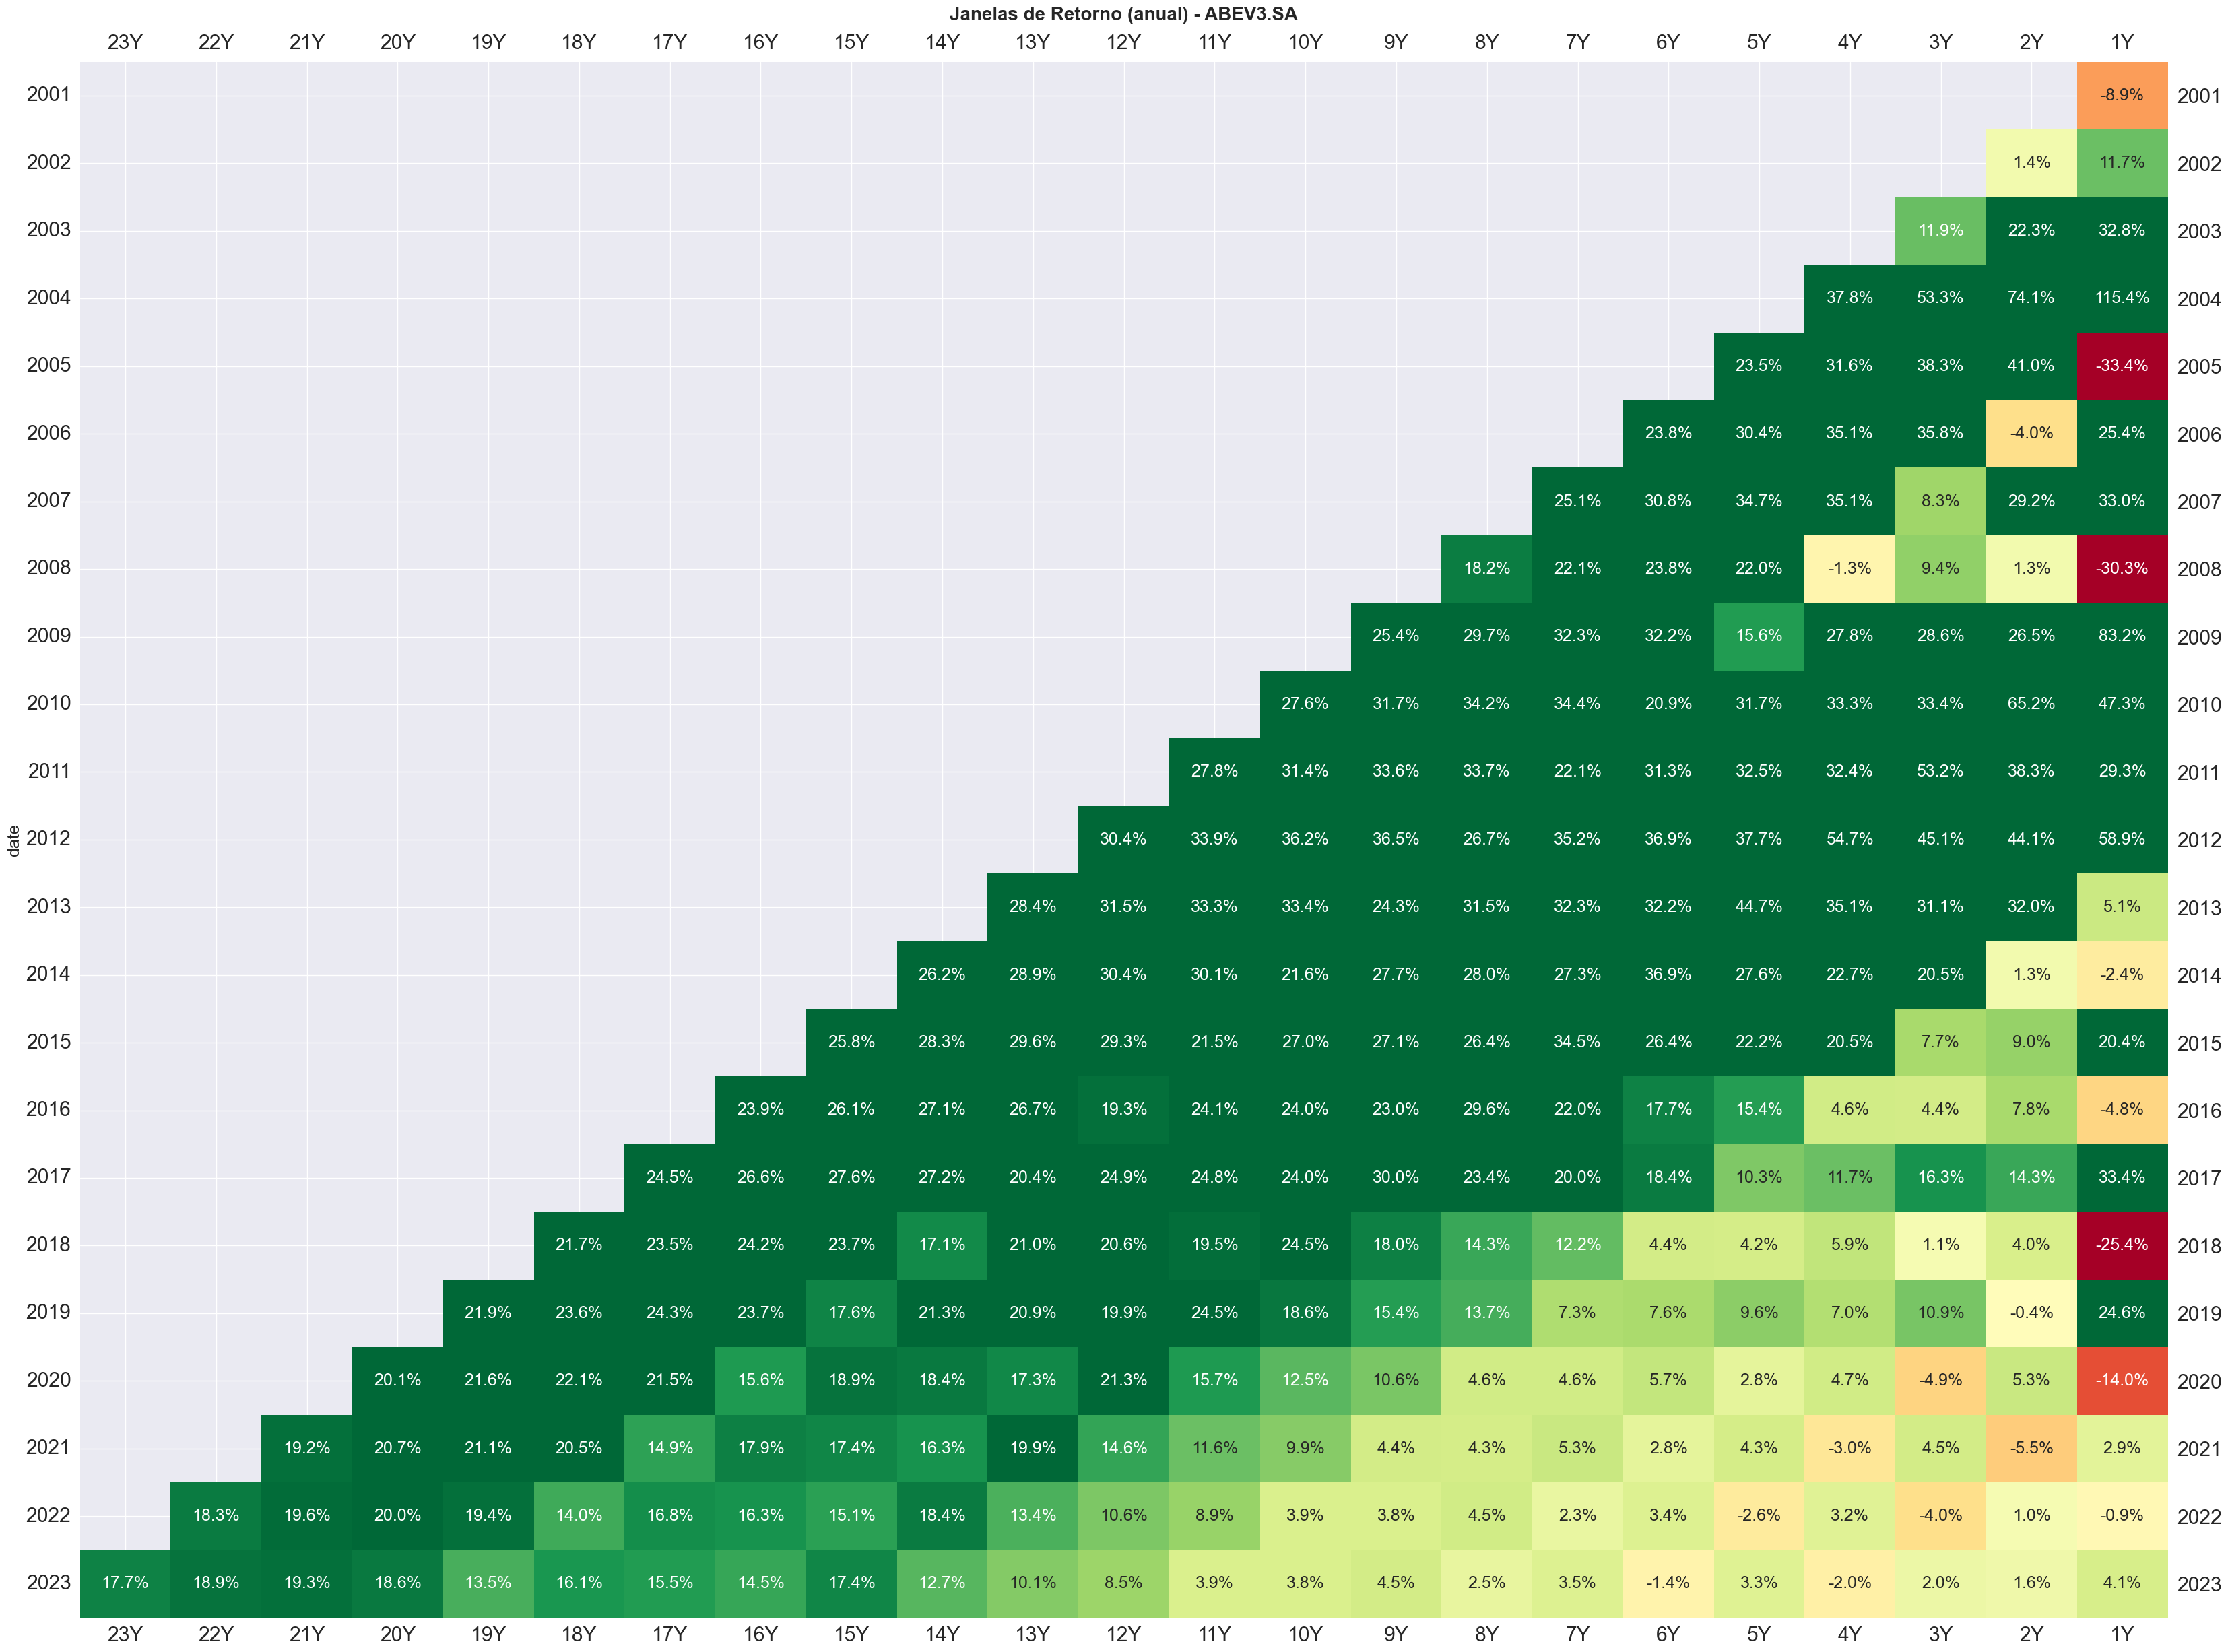

In [30]:
plt.figure(figsize=(40,30))
sns.set(font_scale=1.5)

aux.pfun_gerar_grafico_retorno_pivot(df_pivot_anual, filter_asset.upper(), 'r', 'Anual')

In [31]:
df_pivot_retorno_real = pd.DataFrame()

NUMBER_BASE = 100

for year in range(df_retorno_anual.index.size, 0, -1):
    df_pivot_retorno_real[f"{year}Y"] = NUMBER_BASE * np.exp(year * df_retorno_anual['return'].rolling(year).mean())

In [32]:
df_pivot_retorno_real

23Y          22Y          21Y          20Y          19Y  \
date                                                                    
2001          NaN          NaN          NaN          NaN          NaN   
2002          NaN          NaN          NaN          NaN          NaN   
2003          NaN          NaN          NaN          NaN          NaN   
2004          NaN          NaN          NaN          NaN          NaN   
2005          NaN          NaN          NaN          NaN          NaN   
2006          NaN          NaN          NaN          NaN          NaN   
2007          NaN          NaN          NaN          NaN          NaN   
2008          NaN          NaN          NaN          NaN          NaN   
2009          NaN          NaN          NaN          NaN          NaN   
2010          NaN          NaN          NaN          NaN          NaN   
2011          NaN          NaN          NaN          NaN          NaN   
2012          NaN          NaN          NaN          NaN          NaN   
2013          NaN          NaN          NaN          NaN          NaN   
2014          NaN          NaN          NaN          NaN          NaN   
2015          NaN          NaN          NaN          NaN          NaN   
2016          NaN          NaN          NaN          NaN          NaN   
2017          NaN          NaN          NaN          NaN          NaN   
2018          NaN          NaN          NaN          NaN          NaN   
2019          NaN          NaN          NaN          NaN  6358.546416   
2020          NaN          NaN          NaN  5530.104316  6047.038034   
2021          NaN          NaN  5690.752061  6222.702536  5536.590976   
2022          NaN  5641.168120  6168.483671  5488.350252  3951.831234   
2023  5875.109569  6424.293103  5715.954284  4115.715221  1297.550765   

              18Y          17Y          16Y          15Y          14Y  ...  \
date                                                                   ...   
2001          NaN          NaN          NaN          NaN          NaN  ...   
2002          NaN          NaN          NaN          NaN          NaN  ...   
2003          NaN          NaN          NaN          NaN          NaN  ...   
2004          NaN          NaN          NaN          NaN          NaN  ...   
2005          NaN          NaN          NaN          NaN          NaN  ...   
2006          NaN          NaN          NaN          NaN          NaN  ...   
2007          NaN          NaN          NaN          NaN          NaN  ...   
2008          NaN          NaN          NaN          NaN          NaN  ...   
2009          NaN          NaN          NaN          NaN          NaN  ...   
2010          NaN          NaN          NaN          NaN          NaN  ...   
2011          NaN          NaN          NaN          NaN          NaN  ...   
2012          NaN          NaN          NaN          NaN          NaN  ...   
2013          NaN          NaN          NaN          NaN          NaN  ...   
2014          NaN          NaN          NaN          NaN  3925.091617  ...   
2015          NaN          NaN          NaN  4812.749777  5262.627843  ...   
2016          NaN          NaN  4588.380710  5017.285584  4464.082596  ...   
2017          NaN  6408.698704  7007.760178  6235.088619  4489.512663  ...   
2018  4972.899050  5437.747279  4838.184428  3483.685891  1098.292533  ...   
2019  6952.919840  6186.294945  4454.379269  1404.320493  1960.712799  ...   
2020  5380.295139  3874.027240  1221.354428  1705.255510  1322.766741  ...   
2021  3986.566481  1256.834380  1754.792632  1361.192688   978.870653  ...   
2022  1245.883489  1739.502995  1349.332516   970.341681  1313.450821  ...   
2023  1811.640864  1405.289863  1010.582130  1367.920141   595.256857  ...   

              10Y           9Y           8Y           7Y          6Y  \
date                                                                   
2001          NaN          NaN          NaN          NaN         NaN   
2002          NaN    

### Plotando gráfico de janela de retorno reais por ano

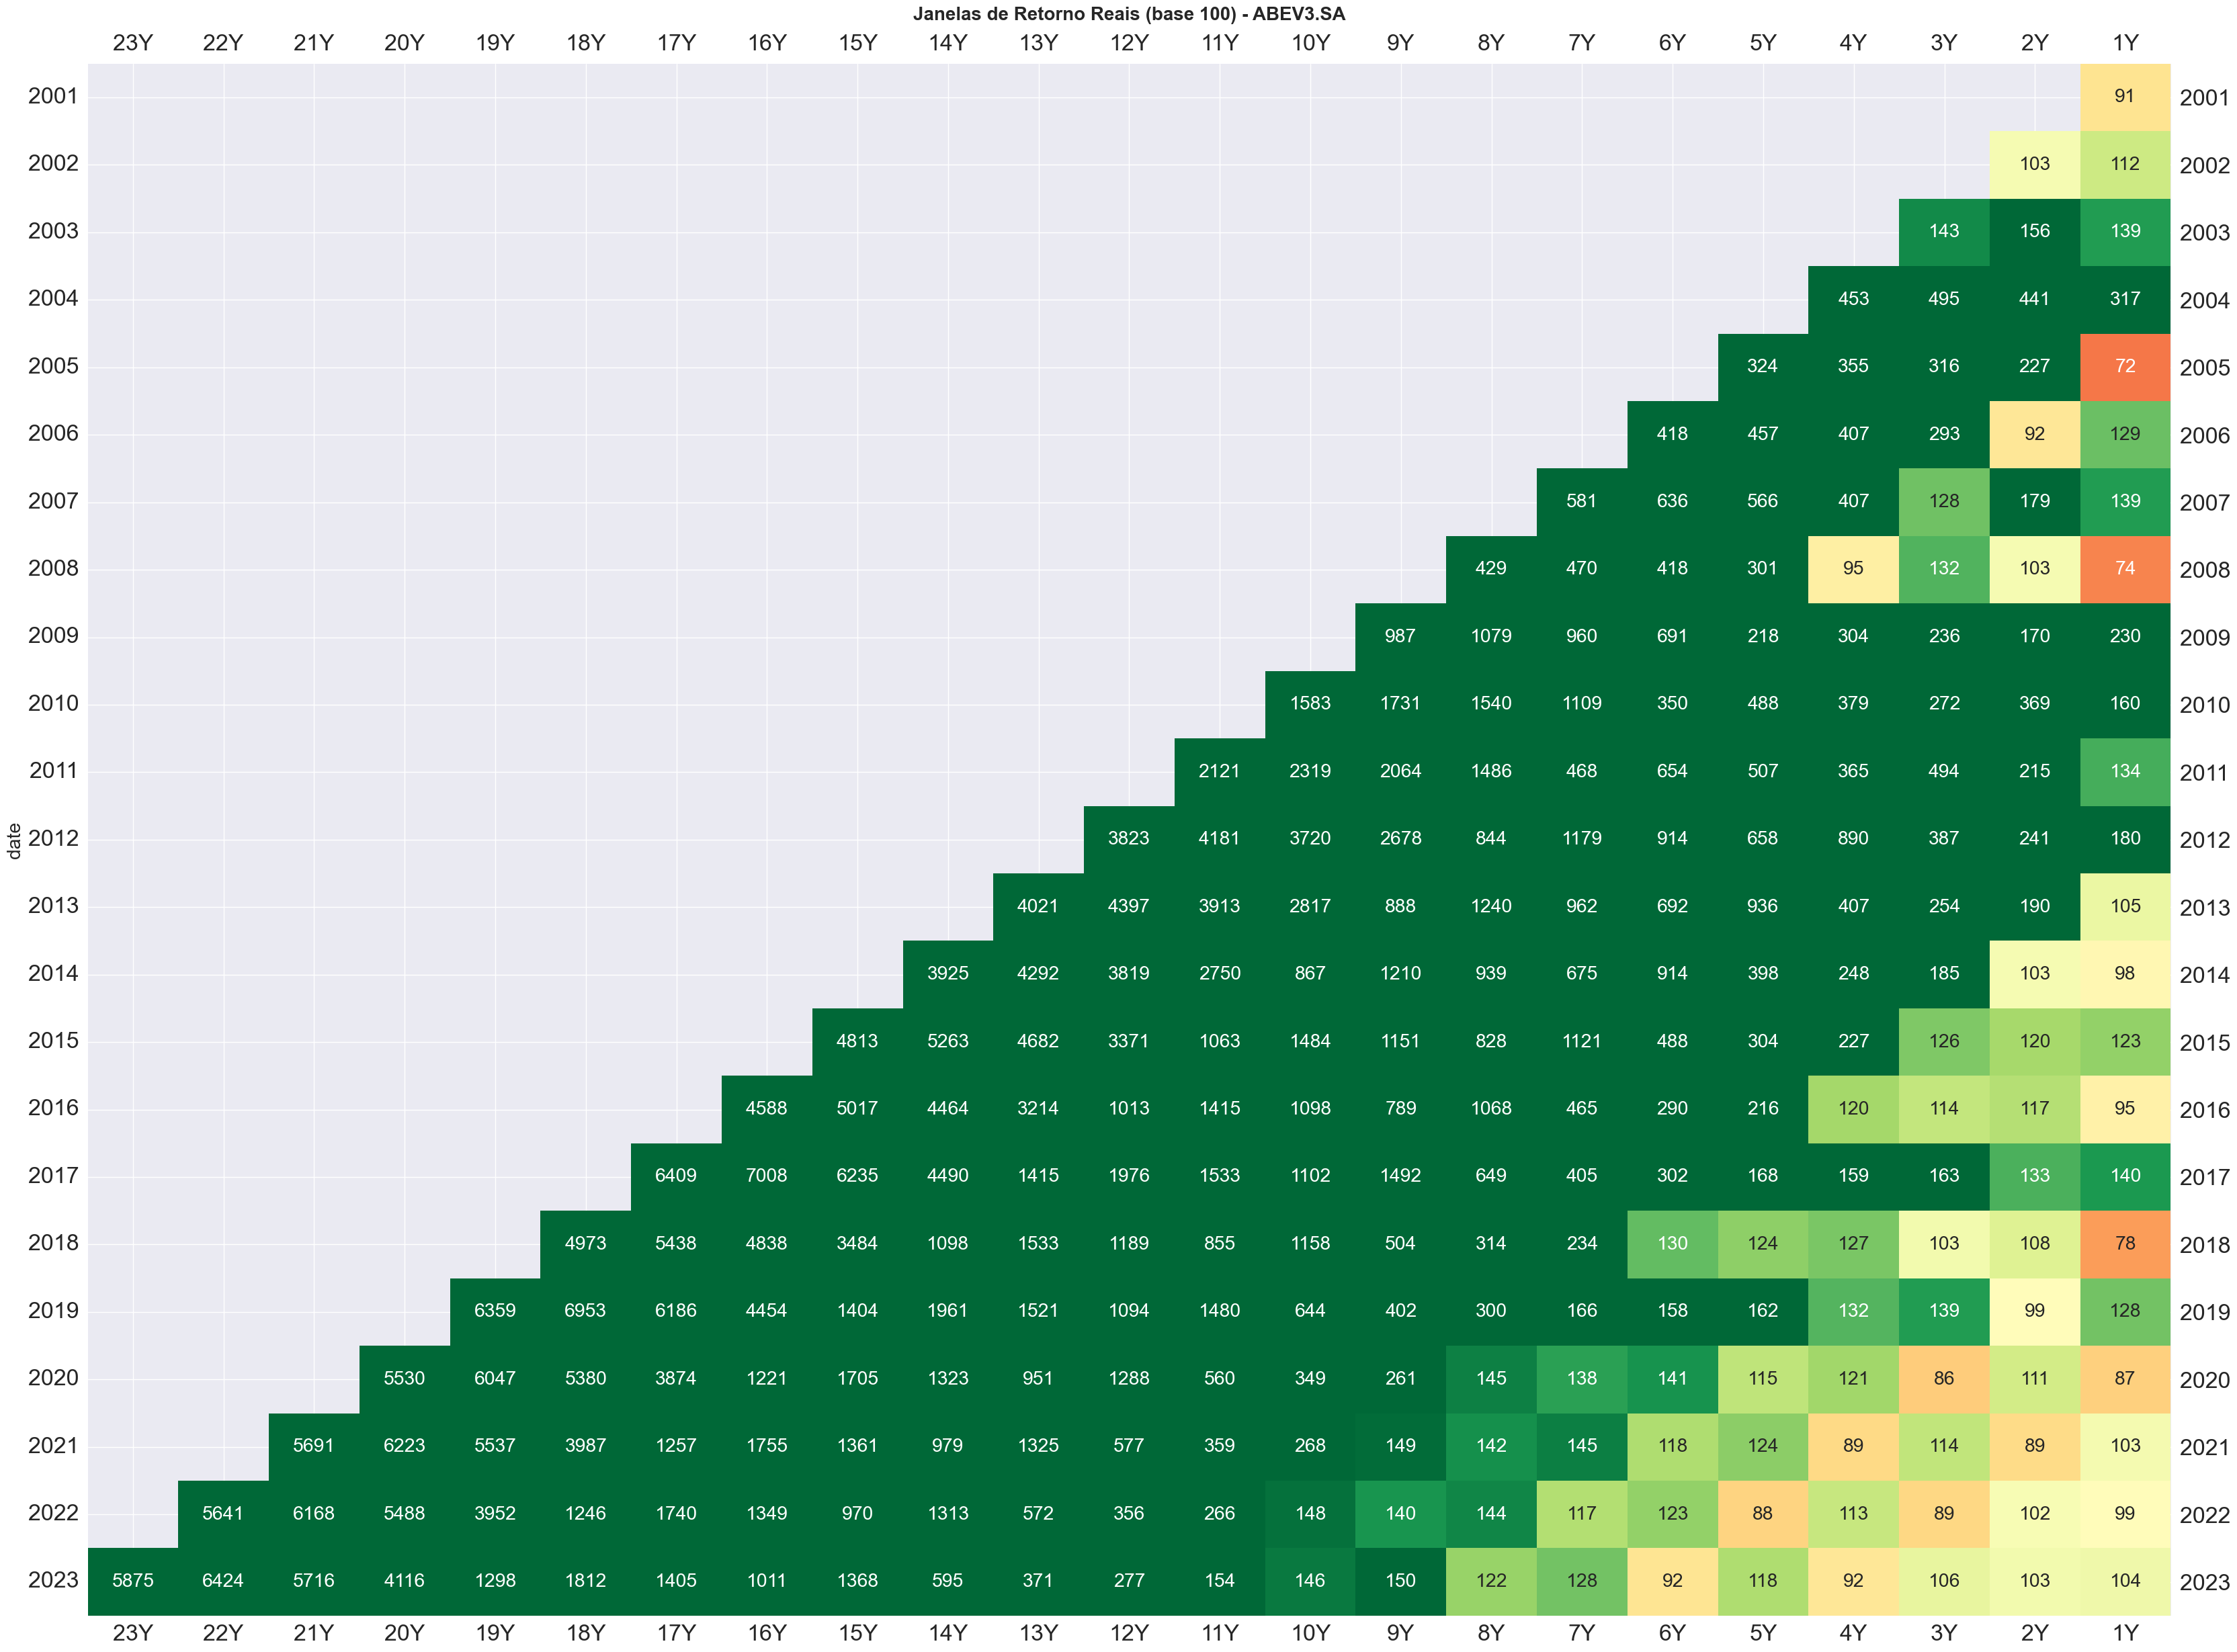

In [33]:
plt.figure(figsize=(40,30))
sns.set(font_scale=1.7)

aux.pfun_gerar_grafico_retorno_pivot(df_pivot_retorno_real, filter_asset.upper(), 'r', 'anual_real', '.0f', NUMBER_BASE)

### Plotando gráfico da quantidade de retorno negativo x retorno negativo

In [34]:
retorno_neg = df_pivot_retorno_real[df_pivot_retorno_real < NUMBER_BASE].count()
retorno_pos = df_pivot_retorno_real[df_pivot_retorno_real >= NUMBER_BASE].count()

total_de_janelas = df_pivot_retorno_real.count()
pd.concat([-retorno_neg, retorno_pos], 
          axis=1, 
          keys=['retorno_negativo','retorno_positivo']).style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

## Obtendo os dividendos do ativo

In [35]:
#obtendo a data atual
data_atual = datetime.today()
data_atual = data_atual.strftime('%Y-%m-%d')
data_atual

'2023-06-28'

In [36]:
data_inicial = '2000-01-01'

In [37]:
#verificando o ativo utilizado
filter_asset

'abev3.sa'

In [38]:
#obtendo os dividendos da empresa
#obtendo os dividendos dos ativos atraves do vectorbt
df_tickers_dividends = vbt.YFData.download(filter_asset, start=data_inicial, end=data_atual).get('Dividends')

In [39]:
#verificando as últimas linhas do df
df_tickers_dividends.tail()

Date
2023-06-20 03:00:00+00:00    0.0
2023-06-21 03:00:00+00:00    0.0
2023-06-22 03:00:00+00:00    0.0
2023-06-23 03:00:00+00:00    0.0
2023-06-26 03:00:00+00:00    0.0
Name: Dividends, dtype: float64

In [40]:
df_ticker = pd.DataFrame(df_tickers_dividends)

In [41]:
df_ticker

Dividends
Date                                
2000-01-05 02:00:00+00:00        0.0
2000-01-06 02:00:00+00:00        0.0
2000-01-07 02:00:00+00:00        0.0
2000-01-10 02:00:00+00:00        0.0
2000-01-11 02:00:00+00:00        0.0
...                              ...
2023-06-20 03:00:00+00:00        0.0
2023-06-21 03:00:00+00:00        0.0
2023-06-22 03:00:00+00:00        0.0
2023-06-23 03:00:00+00:00        0.0
2023-06-26 03:00:00+00:00        0.0

[5896 rows x 1 columns]

In [42]:
#alterando nome de uma coluna especifica
df_ticker.rename(columns = {'Dividends':'dividendos_pagos'}, inplace = True)

In [43]:
df_ticker

dividendos_pagos
Date                                       
2000-01-05 02:00:00+00:00               0.0
2000-01-06 02:00:00+00:00               0.0
2000-01-07 02:00:00+00:00               0.0
2000-01-10 02:00:00+00:00               0.0
2000-01-11 02:00:00+00:00               0.0
...                                     ...
2023-06-20 03:00:00+00:00               0.0
2023-06-21 03:00:00+00:00               0.0
2023-06-22 03:00:00+00:00               0.0
2023-06-23 03:00:00+00:00               0.0
2023-06-26 03:00:00+00:00               0.0

[5896 rows x 1 columns]

In [44]:
df_ticker.index

DatetimeIndex(['2000-01-05 02:00:00+00:00', '2000-01-06 02:00:00+00:00',
               '2000-01-07 02:00:00+00:00', '2000-01-10 02:00:00+00:00',
               '2000-01-11 02:00:00+00:00', '2000-01-12 02:00:00+00:00',
               '2000-01-13 02:00:00+00:00', '2000-01-14 02:00:00+00:00',
               '2000-01-17 02:00:00+00:00', '2000-01-18 02:00:00+00:00',
               ...
               '2023-06-13 03:00:00+00:00', '2023-06-14 03:00:00+00:00',
               '2023-06-15 03:00:00+00:00', '2023-06-16 03:00:00+00:00',
               '2023-06-19 03:00:00+00:00', '2023-06-20 03:00:00+00:00',
               '2023-06-21 03:00:00+00:00', '2023-06-22 03:00:00+00:00',
               '2023-06-23 03:00:00+00:00', '2023-06-26 03:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=5896, freq=None)

In [45]:
#verificando o total de dividendos pagos no periodo por ordem decrescente
df_total_dividends = df_ticker.sum()
df_total_dividends

dividendos_pagos    7.597301
dtype: float64

In [46]:
df_ticker['month'] = df_ticker.index.month
df_ticker['quarter'] = df_ticker.index.quarter
df_ticker['year'] = df_ticker.index.year

In [47]:
#verificando a quantidade de anos
len(df_ticker.year.drop_duplicates())

24

In [48]:
media_dividendos_por_ano = df_total_dividends/len(df_ticker.year.drop_duplicates())
media_dividendos_por_ano

dividendos_pagos    0.316554
dtype: float64

In [49]:
df_ticker

dividendos_pagos  month  quarter  year
Date                                                             
2000-01-05 02:00:00+00:00               0.0      1        1  2000
2000-01-06 02:00:00+00:00               0.0      1        1  2000
2000-01-07 02:00:00+00:00               0.0      1        1  2000
2000-01-10 02:00:00+00:00               0.0      1        1  2000
2000-01-11 02:00:00+00:00               0.0      1        1  2000
...                                     ...    ...      ...   ...
2023-06-20 03:00:00+00:00               0.0      6        2  2023
2023-06-21 03:00:00+00:00               0.0      6        2  2023
2023-06-22 03:00:00+00:00               0.0      6        2  2023
2023-06-23 03:00:00+00:00               0.0      6        2  2023
2023-06-26 03:00:00+00:00               0.0      6        2  2023

[5896 rows x 4 columns]

In [50]:
df_dividendo_mensal = aux.pfun_pivot_por_ano(df_ticker, coluna_aux='month')
df_dividendo_mensal

month        1         2         3         4    5         6         7    8   \
year                                                                          
2000   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2001   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2002   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2003   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2004   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2005   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2006   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2007   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2008   0.000000  0.000000  0.000000  0.013585  0.0  0.000000  0.046348  0.0   
2009   0.013245  0.000000  0.000000  0.016382  0.0  0.000000  0.031165  0.0   
2010   0.000000  0.000000  0.043951  0.000000  0.0  0.000000  0.000000  0.0   
2011   0.000000  0.000000  0.111874  0.000000  0.0  0.000000  0.085741  0.0   
2012   0.000000  0.000000  0.150496  0.000000  0.0  0.042796  0.000000  0.0   
2013   0.000000  0.127188  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2014   0.153986  0.000000  0.000000  0.059994  0.0  0.000000  0.160000  0.0   
2015   1.090000  0.000000  0.090000  0.000000  0.0  0.100000  0.000000  0.0   
2016   0.000000  0.130000  0.000000  0.000000  0.0  0.000000  0.130000  0.0   
2017   0.070000  0.000000  0.000000  0.000000  0.0  0.160000  0.000000  0.0   
2018   0.000000  0.070000  0.000000  0.000000  0.0  0.160000  0.000000  0.0   
2019   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2020   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2021   0.076700  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2022   0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
2023   0.000000  0.000000  0.000000  0.000000  0.0  0.000000       NaN  NaN   

month        9         10    11        12  
year                                       
2000   0.000000  0.000000  0.00  0.000000  
2001   0.000000  0.000000  0.00  0.000000  
2002   0.000000  0.000000  0.00  0.000000  
2003   0.000000  0.000000  0.00  0.000000  
2004   0.000000  0.000000  0.00  0.000000  
2005   0.000000  0.000000  0.00  0.000000  
2006   0.000000  0.000000  0.00  0.000000  
2007   0.000000  0.000000  0.00  0.016302  
2008   0.037558  0.000000  0.00  0.000000  
2009   0.043951  0.000000  0.00  0.059134  
2010   0.063170  0.000000  0.00  0.010189  
2011   0.000000  0.019986  0.00  0.000000  
2012   0.000000  0.102690  0.00  0.180682  
2013   0.129988  0.000000  0.00  0.000000  
2014   0.000000  0.220000  0.00  0.000000  
2015   0.150000  0.000000  0.00  0.150000  
2016   0.000000  0.000000  0.16  0.220000  
2017   0.000000  0.000000  0.00  0.310000  
2018   0.000000  0.000000  0.00  0.320000  
2019   0.000000  0.000000  0.00  0.490600  
2020   0.000000  0.000000  0.00  0.413700  
2021   0.000000  0.000000  0.00  0.603600  
2022   0.000000  0.000000  0.00  0.762300  
2023        NaN       NaN   NaN       NaN

In [51]:
media_dividendo_aux = media_dividendos_por_ano[0]
media_dividendo_aux

0.31655420833333336

### Plotando gráfico da soma dos dividendos mensal

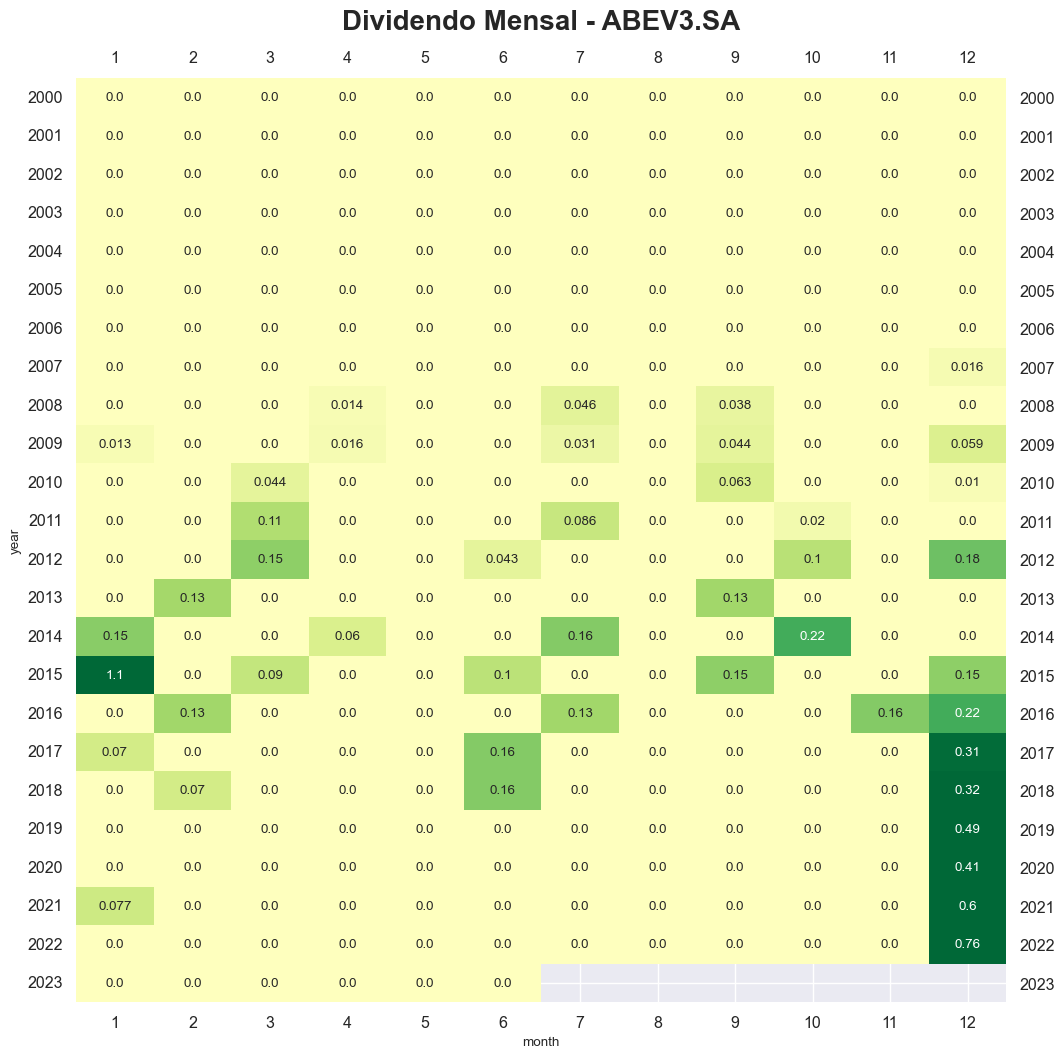

In [52]:
#visualizando grafico
plt.figure(figsize=(12,12))
sns.set(font_scale=0.8)

aux.pfun_gerar_grafico_retorno_pivot(df_dividendo_mensal, filter_asset.upper(), 'd', 'Mensal', '.2', media_dividendo_aux)

In [53]:
df_dividendo_trimestral = aux.pfun_pivot_por_ano(df_ticker, coluna_aux='quarter')
df_dividendo_trimestral

quarter         1         2         3         4
year                                           
2000     0.000000  0.000000  0.000000  0.000000
2001     0.000000  0.000000  0.000000  0.000000
2002     0.000000  0.000000  0.000000  0.000000
2003     0.000000  0.000000  0.000000  0.000000
2004     0.000000  0.000000  0.000000  0.000000
2005     0.000000  0.000000  0.000000  0.000000
2006     0.000000  0.000000  0.000000  0.000000
2007     0.000000  0.000000  0.000000  0.016302
2008     0.000000  0.013585  0.083906  0.000000
2009     0.013245  0.016382  0.075116  0.059134
2010     0.043951  0.000000  0.063170  0.010189
2011     0.111874  0.000000  0.085741  0.019986
2012     0.150496  0.042796  0.000000  0.283372
2013     0.127188  0.000000  0.129988  0.000000
2014     0.153986  0.059994  0.160000  0.220000
2015     1.180000  0.100000  0.150000  0.150000
2016     0.130000  0.000000  0.130000  0.380000
2017     0.070000  0.160000  0.000000  0.310000
2018     0.070000  0.160000  0.000000  0.320000
2019     0.000000  0.000000  0.000000  0.490600
2020     0.000000  0.000000  0.000000  0.413700
2021     0.076700  0.000000  0.000000  0.603600
2022     0.000000  0.000000  0.000000  0.762300
2023     0.000000  0.000000       NaN       NaN

### Plotando gráfico da soma dos dividendos trimestral

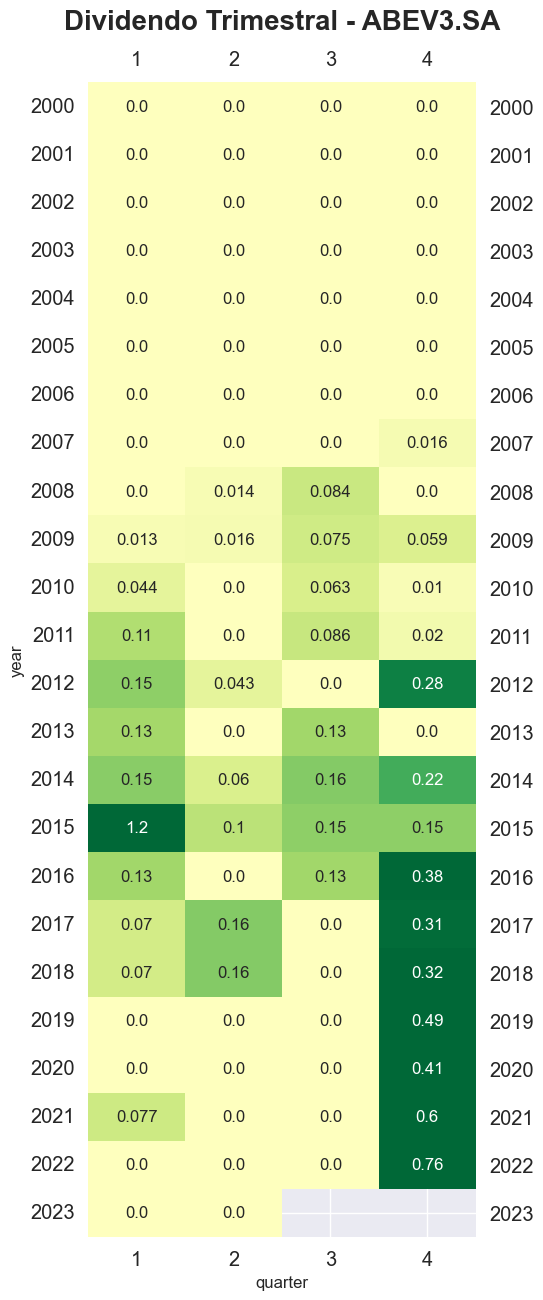

In [54]:
plt.figure(figsize=(5,15))
sns.set(font_scale=1)

aux.pfun_gerar_grafico_retorno_pivot(df_dividendo_trimestral, filter_asset.upper(), 'd', 'Trimestral', '.2', media_dividendo_aux)

In [55]:
df_dividendo_anual = aux.pfun_pivot_por_ano(df_ticker)
df_dividendo_anual

dividendos_pagos
year                  
2000          0.000000
2001          0.000000
2002          0.000000
2003          0.000000
2004          0.000000
2005          0.000000
2006          0.000000
2007          0.016302
2008          0.097491
2009          0.163877
2010          0.117310
2011          0.217601
2012          0.476664
2013          0.257176
2014          0.593980
2015          1.580000
2016          0.640000
2017          0.540000
2018          0.550000
2019          0.490600
2020          0.413700
2021          0.680300
2022          0.762300
2023          0.000000

In [56]:
df_pivot_dividendo_anual = pd.DataFrame()

for year in range(df_dividendo_anual.index.size, 0, -1):
    df_pivot_dividendo_anual[f"{year}Y"] = df_dividendo_anual['dividendos_pagos'].rolling(year).sum()

### Plotando gráfico da janela de dividendos por ano

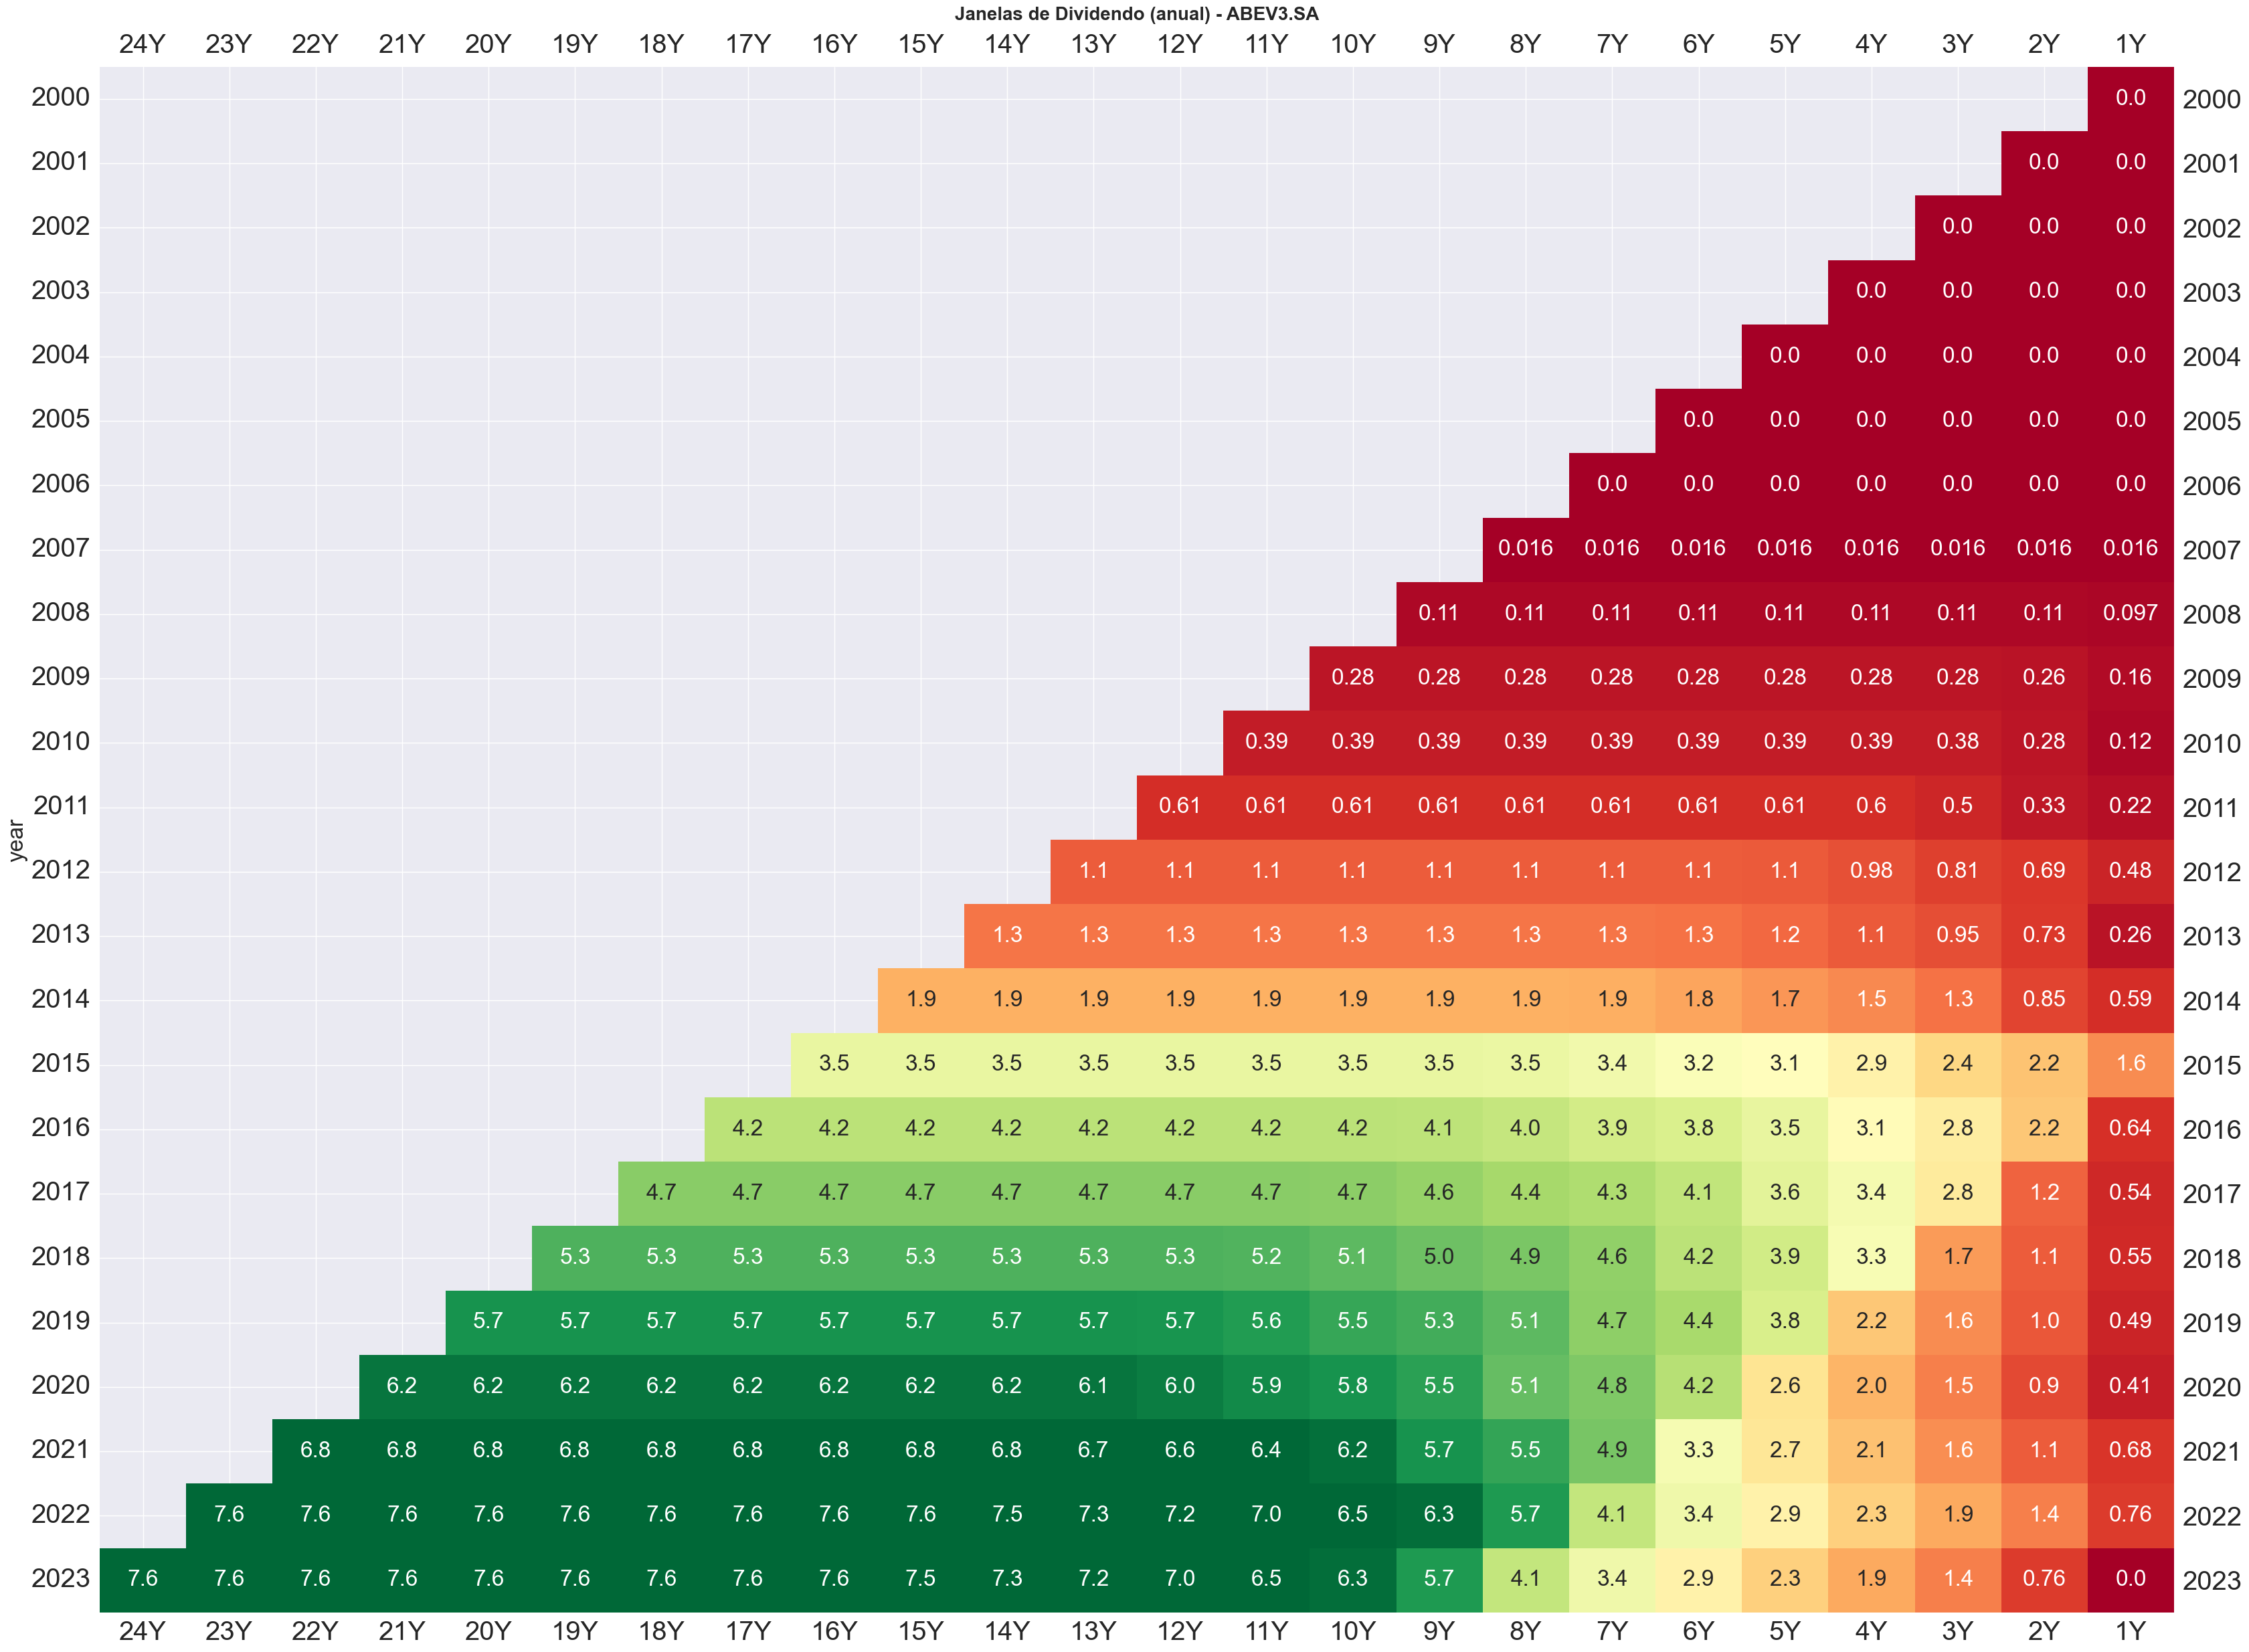

In [57]:
plt.figure(figsize=(40,30))
sns.set(font_scale=2)

aux.pfun_gerar_grafico_retorno_pivot(df_pivot_dividendo_anual, filter_asset.upper(), 'd', 'Anual', '.2', media_dividendo_aux)

# Estudo de caso: Ação aleatória (random)

## Selecionando uma ação aleatória e verificando o resultado quantitativo

In [58]:
#selecionando apenas UMA acao da carteira
RANDON_NUMBER = 1
carteira = random.sample(list(df.columns) , k=RANDON_NUMBER)
carteira

['rail3.sa']

In [59]:
carteira[0]

'rail3.sa'

In [60]:
df_asset = aux.pfun_pivot_calcular_retorno(str(carteira[0]), df, 1, 'D')

D >>>>> RETORNO DO ATIVO CALCULADO COM SUCESSO! >>>>> rail3.sa


In [61]:
df_asset

return
date                
2015-04-06  0.011628
2015-04-07 -0.091954
2015-04-08 -0.012658
2015-04-09  0.044872
2015-04-10  0.024540
...              ...
2023-06-14  0.016386
2023-06-15  0.000436
2023-06-16 -0.047474
2023-06-19  0.011888
2023-06-20  0.000000

[2041 rows x 1 columns]

In [62]:
df_media = df_asset['return'].mean()
print('Média dos retornos: {:.2f}%'.format(df_media*100))

Média dos retornos: 0.08%


In [63]:
df_desvio_padrao = df_asset['return'].std()
print('Desvio padrão dos retornos: {:.2f}%'.format(df_desvio_padrao*100))

Desvio padrão dos retornos: 3.21%


### Dado uma porcentagem "x", iremos verificar o comportamento da ação com e sem os seus principais retornos

#### No exemplo abaixo iremos utilizar 10%

In [64]:
NUMBER = 10
PERCENT_NUMBER = NUMBER/100
#verificando os piores retornos
df_asset[df_asset["return"] < -PERCENT_NUMBER]

return
date                
2016-01-07 -0.128352
2016-01-13 -0.156962
2016-01-14 -0.216216
2016-01-19 -0.186667
2016-01-22 -0.257426
2016-03-15 -0.119266
2016-04-05 -0.102778
2016-04-07 -0.164087
2017-05-18 -0.169410
2017-05-22 -0.109357
2020-03-09 -0.101036
2020-03-12 -0.165304
2020-03-16 -0.165616

In [65]:
#verificando a probabilidade da acao cair mais que a porcentagem informada
probabilidade_teorica = norm.cdf(-PERCENT_NUMBER, loc=df_media, scale=df_desvio_padrao)
print('{:.8f}%'.format(probabilidade_teorica*100))

0.08506755%


In [66]:
frequencia_teorica = 1 / probabilidade_teorica
print('Uma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Uma vez a cada 1175 dias
Ou uma vez a cada 4 anos


#### Plotando gráfico do retorno diário da ação

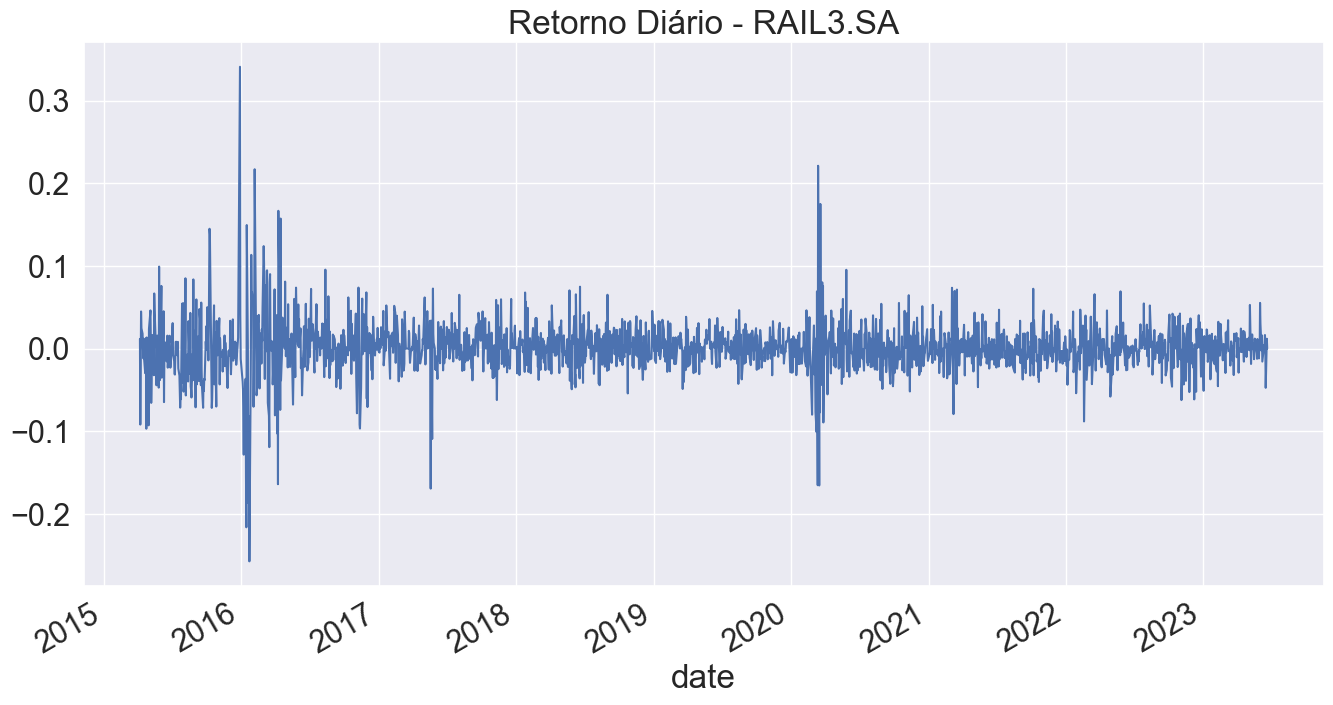

In [67]:
df_asset['return'].plot(title=f"Retorno Diário - {carteira[0].upper()}");

In [68]:
#criando um retorno teorico apenas para exemplo
df_asset['retorno_teorico'] = norm.rvs(size=df_asset['return'].size,  loc=df_media, scale=df_desvio_padrao)

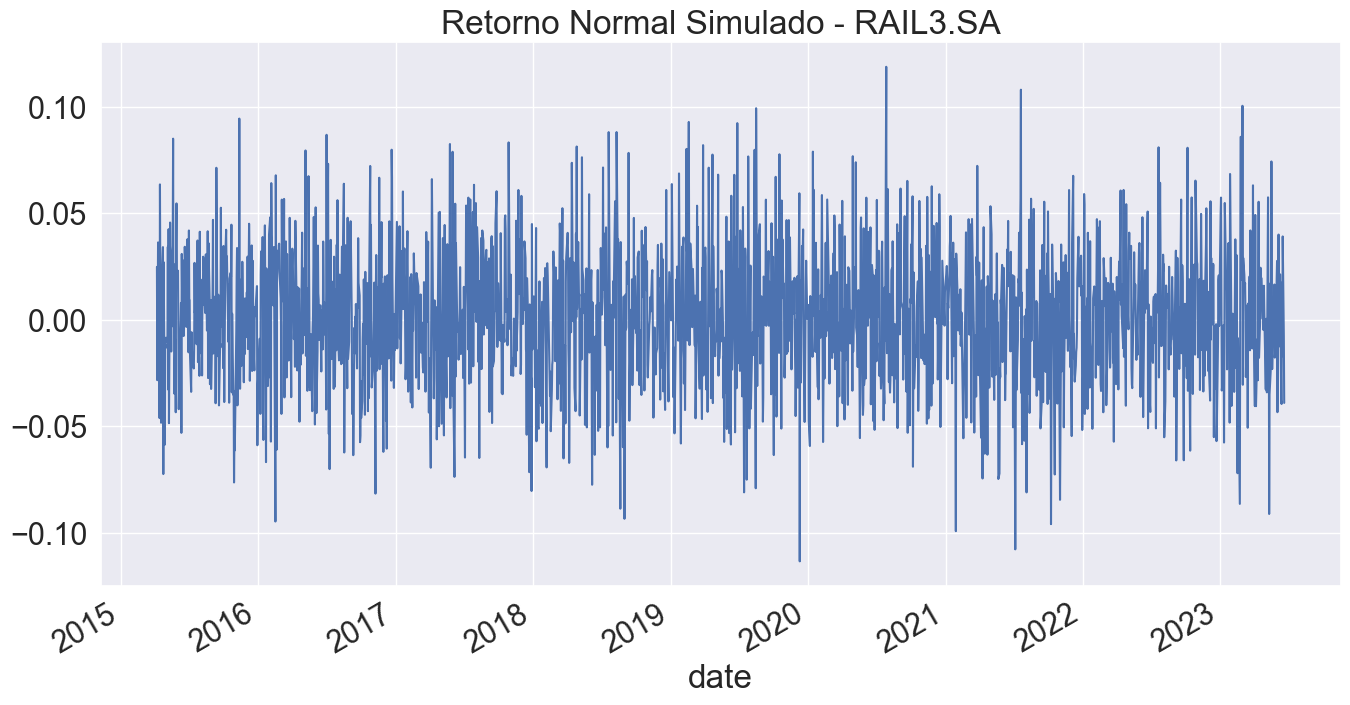

In [69]:
ax = df_asset['retorno_teorico'].plot(title=f"Retorno Normal Simulado - {carteira[0].upper()}");
#ax.set_ylim(-0.2, 0.4)

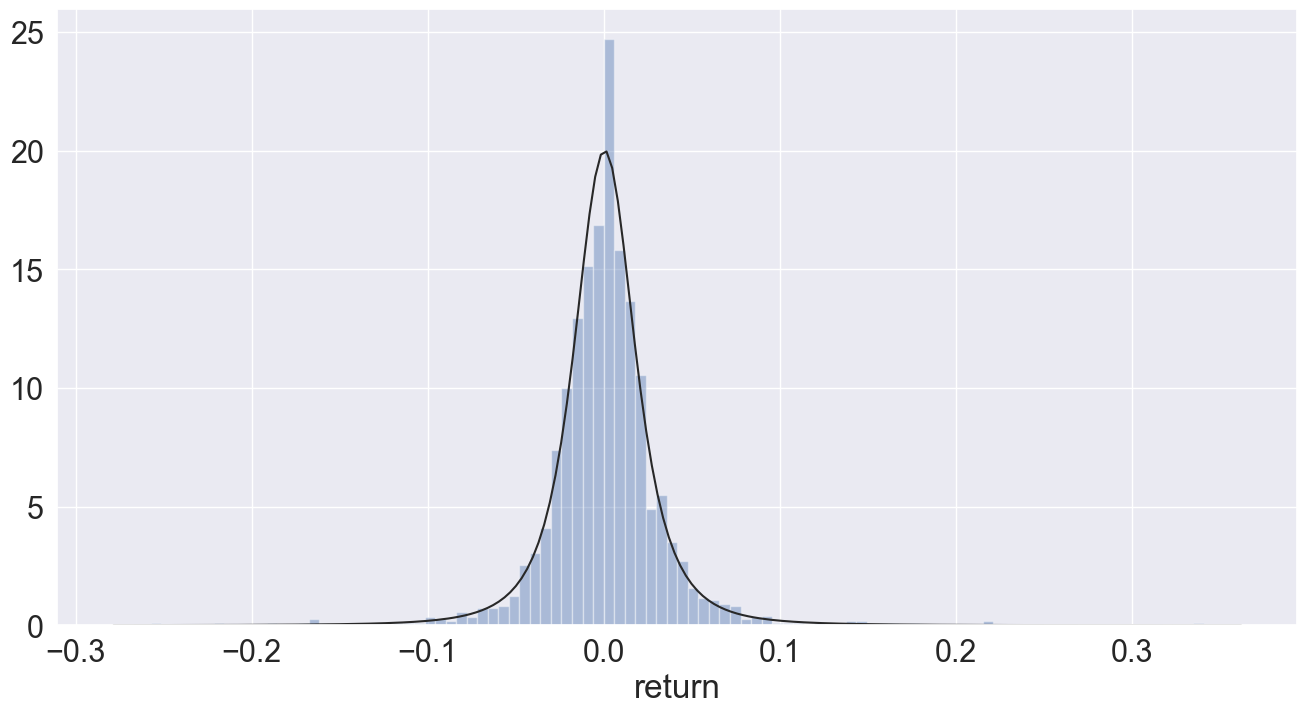

In [70]:
sns.distplot(df_asset['return'], bins=100, kde=False, fit=t);

In [71]:
(graus_de_liberdade,  media_t, desvio_padrao_t) = t.fit(df_asset['return'])
print('Distribuição T-Student\nGraus de liberdade = {:.2f} \nMédia = {:.4f} \nDesvio padrão = {:.5f}'.format(graus_de_liberdade, media_t, desvio_padrao_t))

Distribuição T-Student
Graus de liberdade = 2.76 
Média = 0.0004 
Desvio padrão = 0.01824


In [72]:
probabilidade_teorica_t = t.cdf(-0.12, graus_de_liberdade,  loc=media_t, scale=desvio_padrao_t)
print('{:.8f}%'.format(probabilidade_teorica_t*100))

0.45332492%


In [73]:
frequencia_teorica_t = 1 / probabilidade_teorica_t
print('Para uma distribuição T-Student: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica_t, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica_t/252, 5))))

Para uma distribuição T-Student: 
Uma vez a cada 220 dias
Ou uma vez a cada 0 anos


In [74]:
frequencia_teorica = 1 / probabilidade_teorica
print('Para uma distribuição Normal: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Para uma distribuição Normal: 
Uma vez a cada 1175 dias
Ou uma vez a cada 4 anos


In [75]:
frequencia_observada = df_asset['return'].size / df_asset[df_asset["return"] < -PERCENT_NUMBER].shape[0] 
print('Na vida real aconteceu: \nUma vez a cada {} dias'.format(int(round(frequencia_observada, 5))))

Na vida real aconteceu: 
Uma vez a cada 157 dias


# Estudo de caso: IBOV

In [76]:
df_ibov = yf.download('^BVSP', start='2000-01-01')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [77]:
df_ibov_aux = aux.pfun_calcular_retorno(df_ibov)
df_ibov_aux

price  daily_return  acum_return
Date                                                
2000-01-03   16930.000000      0.000000     1.000000
2000-01-04   15851.000000     -0.063733     0.936267
2000-01-05   16245.000000      0.024856     0.959539
2000-01-06   16107.000000     -0.008495     0.951388
2000-01-07   16309.000000      0.012541     0.963320
...                   ...           ...          ...
2023-06-22  118934.000000     -0.012340     7.025044
2023-06-23  118977.000000      0.000362     7.027584
2023-06-26  118243.000000     -0.006169     6.984229
2023-06-27  117523.000000     -0.006089     6.941701
2023-06-28  116991.992188     -0.004518     6.910336

[5814 rows x 3 columns]

## Plotando gráfico de preço

In [78]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_ibov_aux.index, y=df_ibov_aux['price']))
fig.show()

In [79]:
#verificando os melhores dias
FILTER_NUMBER = 10
ibov_melhores = df_ibov_aux['daily_return'].sort_values(ascending=False)[:FILTER_NUMBER]
ibov_melhores

Date
2008-10-13    0.146560
2020-03-13    0.139082
2008-10-28    0.134262
2020-03-24    0.096885
2008-09-19    0.095657
2008-11-24    0.094013
2008-10-20    0.083574
2008-12-08    0.083119
2008-09-30    0.076323
2001-01-03    0.076110
Name: daily_return, dtype: float64

In [80]:
#os piores dias
ibov_piores = df_ibov_aux['daily_return'].sort_values(ascending=True)[:FILTER_NUMBER]
ibov_piores

Date
2020-03-12   -0.147797
2020-03-16   -0.139215
2020-03-09   -0.121738
2008-10-15   -0.113931
2020-03-18   -0.103488
2008-10-22   -0.101760
2008-09-29   -0.093634
2017-05-18   -0.087992
2011-08-08   -0.080851
2008-11-12   -0.077505
Name: daily_return, dtype: float64

In [81]:
ibov_sem_melhores_dias = (1 + df_ibov_aux['daily_return'].drop(ibov_melhores.index)).cumprod()
ibov_sem_piores_dias = (1 + df_ibov_aux['daily_return'].drop(ibov_piores.index)).cumprod()

In [82]:
print("Retorno do IBOV desde 1995: {:.2%}".format(df_ibov_aux['acum_return'].iloc[-1] - 1))
print("Retorno do IBOV sem os 10 piores dias: {:.2%}".format(ibov_sem_piores_dias.iloc[-1] - 1))
print("Retorno do IBOV sem os 10 melhores dias: {:.2%}".format(ibov_sem_melhores_dias.iloc[-1] - 1))

Retorno do IBOV desde 1995: 591.03%
Retorno do IBOV sem os 10 piores dias: 2044.71%
Retorno do IBOV sem os 10 melhores dias: 161.00%


## Plotando gráfico do IBOV sem os melhores/piores dias

In [83]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_ibov_aux.index, y=df_ibov_aux['acum_return'], name='IBOV'))
fig.add_trace(go.Scatter(x=ibov_sem_melhores_dias.index, y=ibov_sem_melhores_dias.values, name=f'IBOV sem {FILTER_NUMBER} melhores dias'))
fig.add_trace(go.Scatter(x=ibov_sem_melhores_dias.index, y=ibov_sem_piores_dias.values, name=f'IBOV sem {FILTER_NUMBER} piores dias'))

fig.show()